In [ ]:
# load the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

pd.set_option("Display.max_columns",None)
pd.set_option("Display.min_rows",None)


In [ ]:
# load the dataset
data=pd.read_csv("/content/IEA-EV-dataEV_salesHistoricalCars.csv")

In [ ]:
data.head(10)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
5,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
6,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00280
7,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [ ]:
# check the shape
data.shape

(2776, 8)

In [ ]:
# check the columns
data.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [ ]:
# check the null values
data.isna().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [ ]:
# check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      2776 non-null   object 
 1   category    2776 non-null   object 
 2   parameter   2776 non-null   object 
 3   mode        2776 non-null   object 
 4   powertrain  2776 non-null   object 
 5   year        2776 non-null   int64  
 6   unit        2776 non-null   object 
 7   value       2776 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 173.6+ KB


In [ ]:
# check the five point summary
data.describe(include=object)

,region,category,parameter,mode,powertrain,unit
count,2776,2776,2776,2776,2776,2776
unique,36,1,7,1,3,5
top,World,Historical,EV sales,Cars,EV,Vehicles
freq,117,2776,834,2776,1112,1664


In [ ]:
data.describe()

,year,value
count,2776.000000,2.776000e+03
mean,2016.438401,9.015623e+04
std,3.583217,6.186595e+05
min,2010.000000,1.600000e-05
25%,2013.000000,9.100000e-01
50%,2017.000000,4.000000e+02
75%,2020.000000,1.000000e+04
max,2022.000000,1.800000e+07


In [ ]:
# check the duplicates
data.duplicated().sum()

0

In [ ]:
data2=data[['parameter', 'powertrain',
               'year', 'unit', 'value']]
data2.head()

,parameter,powertrain,year,unit,value
0,EV stock,BEV,2011,Vehicles,49.00000
1,EV stock share,EV,2011,percent,0.00046
2,EV sales share,EV,2011,percent,0.00650
3,EV sales,BEV,2011,Vehicles,49.00000
4,EV sales,BEV,2012,Vehicles,170.00000


In [ ]:
data['region'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Denmark', 'EU27', 'Europe', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Israel', 'Italy',
       'Japan', 'Korea', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Other Europe', 'Poland', 'Portugal', 'Rest of the world',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'USA', 'World'], dtype=object)

In [ ]:
data1=data[data['region'] == "India"].reset_index(drop=True)
data1

,region,category,parameter,mode,powertrain,year,unit,value
0,India,Historical,EV sales share,Cars,EV,2010,percent,0.021000
1,India,Historical,EV stock,Cars,BEV,2010,Vehicles,880.000000
2,India,Historical,EV sales,Cars,BEV,2010,Vehicles,450.000000
3,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000016
4,India,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",0.910000
5,India,Historical,EV stock share,Cars,EV,2010,percent,0.005200
6,India,Historical,EV stock share,Cars,EV,2011,percent,0.007000
7,India,Historical,Oil displacement Mbd,Cars,EV,2011,Milion barrels per day,0.000031
8,India,Historical,"Oil displacement, million lge",Cars,EV,2011,"Oil displacement, million lge",1.800000
9,India,Historical,EV stock,Cars,BEV,2011,Vehicles,1300.000000


In [ ]:
df=data['parameter'].unique()
df

array(['EV stock', 'EV stock share', 'EV sales share', 'EV sales',
       'Oil displacement Mbd', 'Oil displacement, million lge',
       'Electricity demand'], dtype=object)

In [ ]:
data2.loc['EV stock share']

,value
year,
2010,0.191202
2011,0.379754
2012,0.941780
2013,1.951549
2014,3.766960
2015,7.139120
2016,11.327510
2017,17.191100
2018,25.331400


In [ ]:
for i in data.columns:
    print(f'{i}:\n{data[i].unique()}')

region:
['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China'
 'Denmark' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'India' 'Israel' 'Italy' 'Japan' 'Korea' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Other Europe' 'Poland' 'Portugal'
 'Rest of the world' 'South Africa' 'Spain' 'Sweden' 'Switzerland'
 'Turkiye' 'United Kingdom' 'USA' 'World']
category:
['Historical']
parameter:
['EV stock' 'EV stock share' 'EV sales share' 'EV sales'
 'Oil displacement Mbd' 'Oil displacement, million lge'
 'Electricity demand']
mode:
['Cars']
powertrain:
['BEV' 'EV' 'PHEV']
year:
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2010]
unit:
['Vehicles' 'percent' 'Milion barrels per day'
 'Oil displacement, million lge' 'GWh']
value:
[4.90000000e+01 4.60000010e-04 6.50000013e-03 1.70000000e+02
 2.99999993e-02 2.79999990e-03 2.20000000e+02 8.00000000e+01
 1.00000000e+02 1.80000000e+02 4.10000000e+02 5.40000014e-03
 3.40000018e-02 1.90000000e+02 3.70000000

In [ ]:
data2=data[['parameter','year','value']].groupby(['parameter','year']).sum()
data2

value
parameter                     year              
EV sales                      2010  1.857400e+04
                              2011  1.144630e+05
                              2012  2.830060e+05
                              2013  5.103210e+05
                              2014  8.105470e+05
                              2015  1.411417e+06
                              2016  1.835620e+06
                              2017  2.815219e+06
                              2018  4.693645e+06
                              2019  5.148213e+06
                              2020  8.359524e+06
                              2021  1.703681e+07
                              2022  2.486218e+07
EV sales share                2010  8.276000e-01
                              2011  3.393190e+00
                              2012  8.534500e+00
                              2013  1.894924e+01
                              2014  3.256970e+01
                              2015  5.510360e+01
                              2016  6.475400e+01
                              2017  9.337300e+01
                              2018  1.352970e+02
                              2019  1.759010e+02
                              2020  3.654820e+02
                              2021  5.702990e+02
                              2022  6.837300e+02
EV stock                      2010  4.473100e+04
                              2011  1.573640e+05
                              2012  4.537990e+05
                              2013  9.586750e+05
...                                          ...
Electricity demand            2019  4.180001e+04
                              2020  4.810005e+04
                              2021  6.840012e+04
                              2022  1.291100e+05
Oil displacement Mbd          2010  6.810000e-04
                              2011  2.618000e-03
                              2012  6.012000e-03
                              2013  1.410700e-02
                              2014  2.625000e-02
                              2015  4.205900e-02
                              2016  6.176800e-02
                              2017  9.208200e-02
                              2018  1.498930e-01
                              2019  2.164000e-01
                              2020  2.611300e-01
                              2021  4.983200e-01
                              2022  8.540000e-01
Oil displacement, million lge 2010  3.971000e+01
                              2011  1.516000e+02
                              2012  3.429000e+02
                              2013  8.191000e+02
                              2014  1.537900e+03
                              2015  2.423400e+03
                              2016  3.613900e+03
                              2017  5.394700e+03
                              2018  8.805300e+03
                              2019  1.238580e+04
                              2020  1.544770e+04
                              2021  2.951800e+04
                              2022  5.045700e+04

[91 rows x 1 columns]

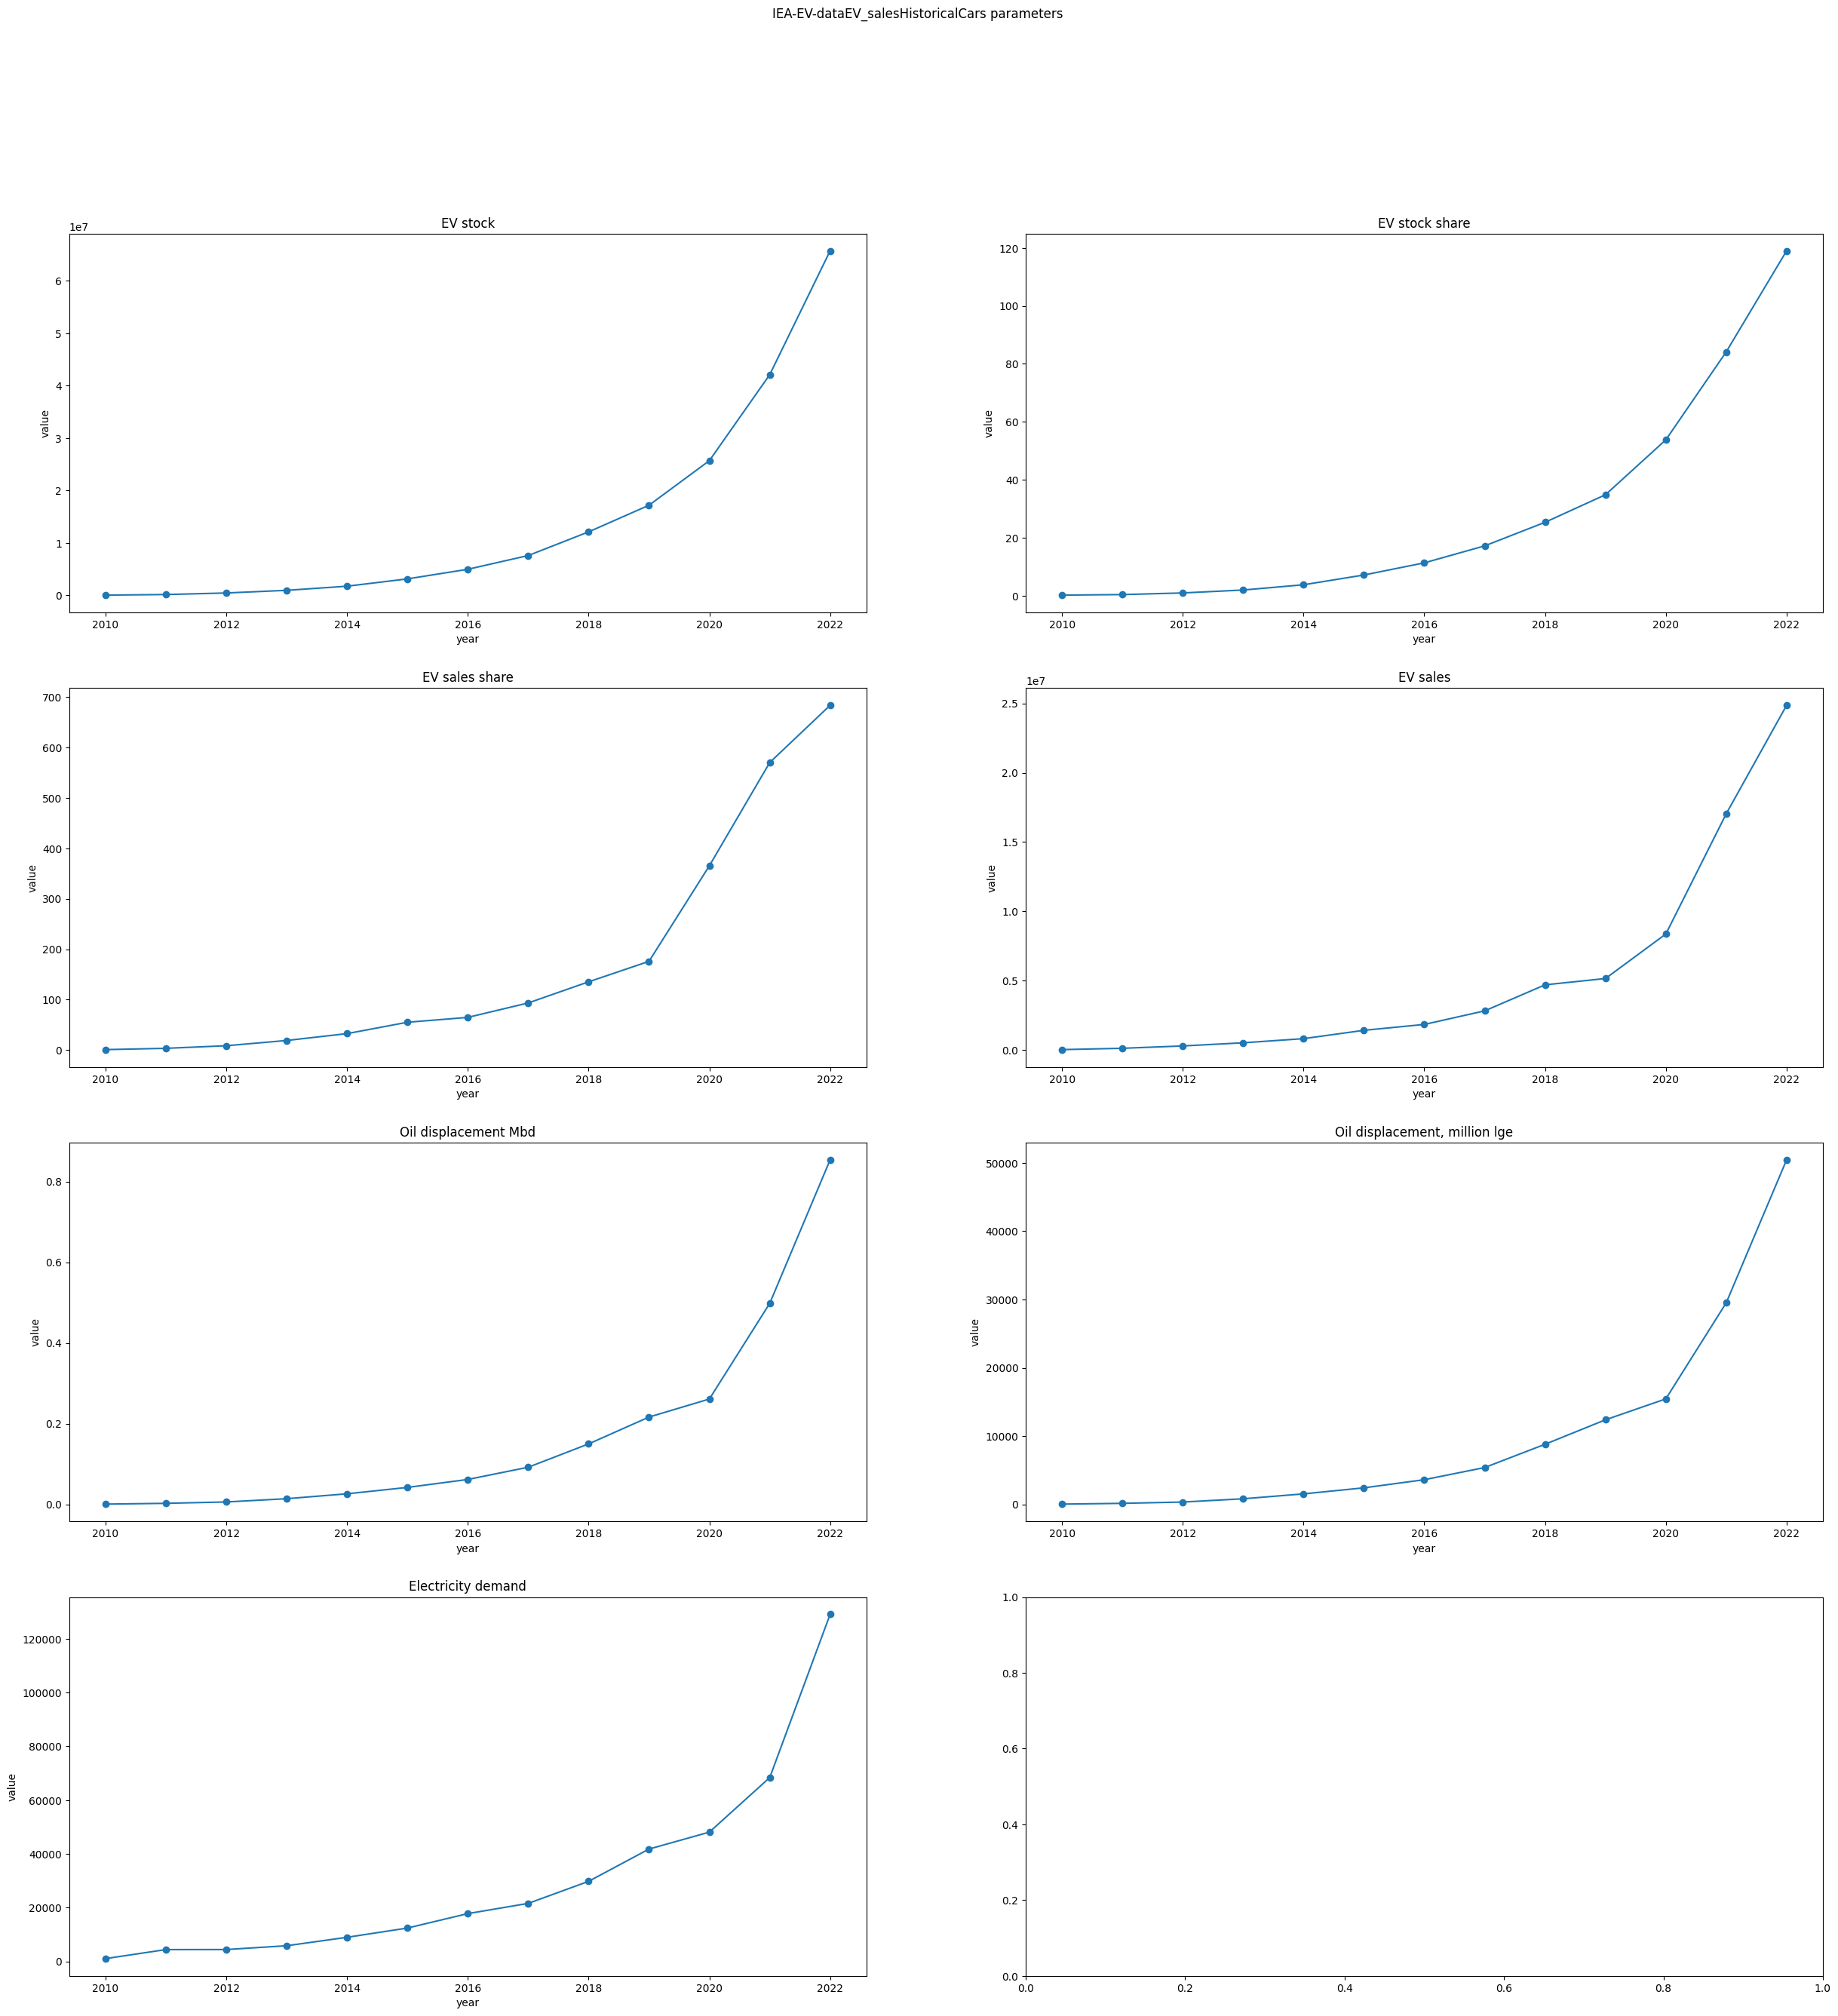

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(30, 30))
axs = axs.flatten()
parameters = data.parameter.unique()
for ax, parameter in zip(axs, parameters):
    temp = data2.loc[parameter]
    ax.plot(temp.index, temp.value, '-o')
    ax.set_title(parameter)
    ax.set_xlabel('year')
    ax.set_ylabel('value')
plt.suptitle('IEA-EV-dataEV_salesHistoricalCars parameters')
plt.show()



*   from 2020,EV market is more popular

*   EV usage is raising exponentially
*   So Next few year EV market is raising




In [ ]:
df1_4 = data[['powertrain', 'year', 'value']].groupby(['powertrain', 'year']).sum()
df1_4

value
powertrain year              
BEV        2010  6.162000e+04
           2011  2.330310e+05
           2012  4.416570e+05
           2013  8.466270e+05
           2014  1.514307e+06
           2015  2.609301e+06
           2016  3.943866e+06
           2017  6.256460e+06
           2018  1.062024e+07
           2019  1.481277e+07
           2020  2.187444e+07
           2021  3.861817e+07
           2022  6.125048e+07
EV         2010  1.106829e+03
           2011  4.575376e+03
           2012  4.792382e+03
           2013  6.690015e+03
           2014  1.056426e+04
           2015  1.491568e+04
           2016  2.149004e+04
           2017  2.710536e+04
           2018  3.876608e+04
           2019  5.439676e+04
           2020  6.396729e+04
           2021  9.857306e+04
           2022  1.803706e+05
PHEV       2010  1.685000e+03
           2011  3.879600e+04
           2012  2.951480e+05
           2013  6.223690e+05
           2014  1.042852e+06
           2015  1.944649e+06
           2016  2.865597e+06
           2017  4.152110e+06
           2018  6.181155e+06
           2019  7.518470e+06
           2020  1.217334e+07
           2021  2.051159e+07
           2022  2.931564e+07

In [ ]:
data.powertrain.unique()

array(['BEV', 'EV', 'PHEV'], dtype=object)

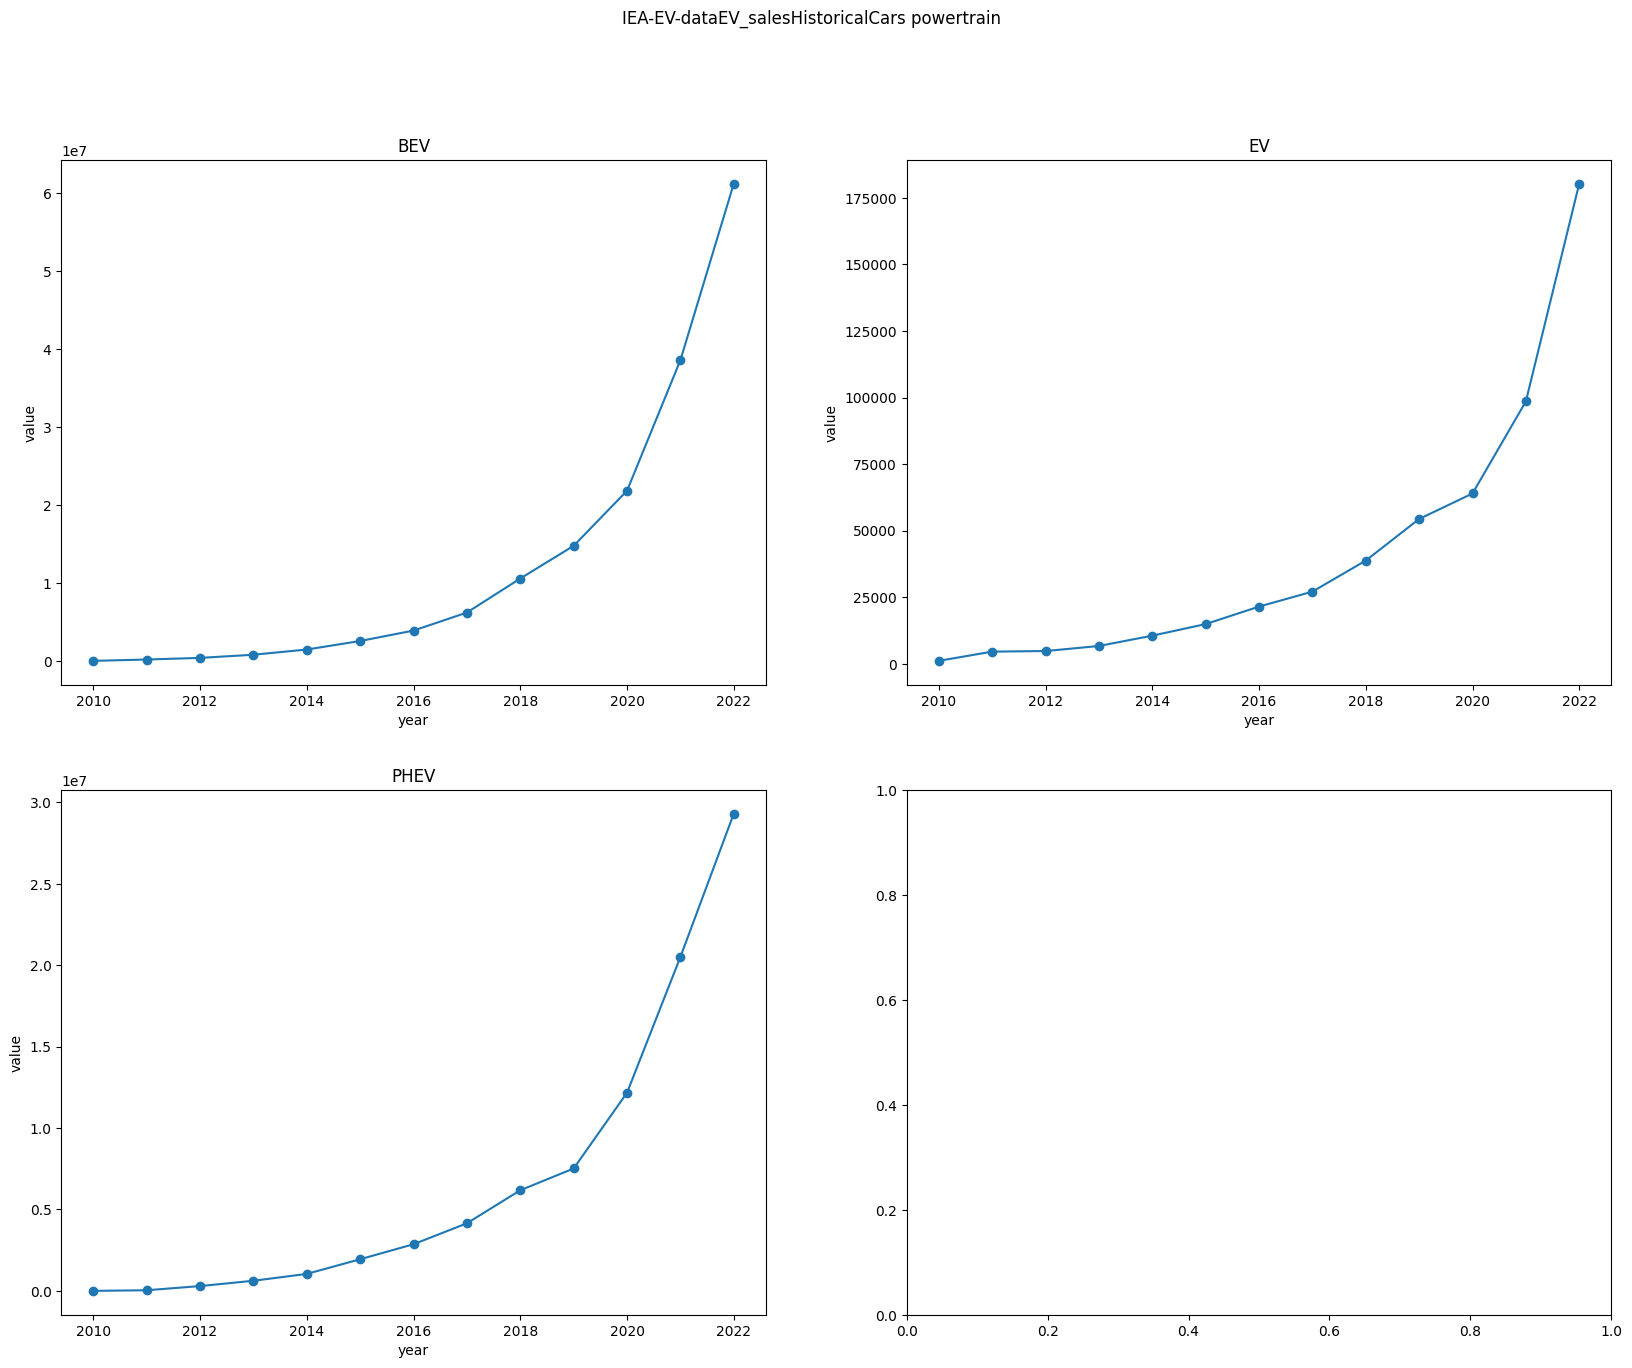

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()
powertrains = data.powertrain.unique()
for ax, powertrain in zip(axs, powertrains):
    temp = df1_4.loc[powertrain]
    ax.plot(temp.index, temp.value, '-o')
    ax.set_title(powertrain)
    ax.set_xlabel('year')
    ax.set_ylabel('value')
plt.suptitle('IEA-EV-dataEV_salesHistoricalCars powertrain')
plt.show()

**PCA**

In [ ]:
data_2=data2.head()
data_2

,parameter,powertrain,year,unit,value
0,EV stock,BEV,2011,Vehicles,49.00000
1,EV stock share,EV,2011,percent,0.00046
2,EV sales share,EV,2011,percent,0.00650
3,EV sales,BEV,2011,Vehicles,49.00000
4,EV sales,BEV,2012,Vehicles,170.00000


In [ ]:
 from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
label=LabelEncoder()

In [ ]:
standard=StandardScaler()

In [ ]:
label_encoders = [LabelEncoder() for _ in range(5)]

data_3 = data_2

for le, column in zip(label_encoders, data_3.columns):
    data_3[column] = le.fit_transform(data_3[column])

standard_scaler = StandardScaler()

data_3 = standard_scaler.fit_transform(data_3)
data_3[:5]

array([[ 0.68599434, -0.81649658, -0.5       , -0.81649658,  0.39223227],
       [ 1.54348727,  1.22474487, -0.5       ,  1.22474487, -1.56892908],
       [-0.17149859,  1.22474487, -0.5       ,  1.22474487, -0.58834841],
       [-1.02899151, -0.81649658, -0.5       , -0.81649658,  0.39223227],
       [-1.02899151, -0.81649658,  2.        , -0.81649658,  1.37281295]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()

In [ ]:
pca = PCA(n_components=5)
data_3_pca = pca.fit_transform(data_3)
data_3_pca[:5]

array([[-5.24171181e-01,  1.26067661e+00, -5.47051587e-01,
         2.10811162e-01,  2.84168104e-17],
       [ 2.76823100e+00, -1.19341507e-01, -6.14791477e-01,
        -1.96411701e-01,  2.84168104e-17],
       [ 1.57007136e+00, -7.09799213e-01,  7.80152637e-01,
         2.19062737e-01,  2.84168104e-17],
       [-1.22138113e+00,  7.19533539e-01,  8.60358363e-01,
        -2.15142078e-01,  2.84168104e-17],
       [-2.59275005e+00, -1.15106943e+00, -4.78667937e-01,
        -1.83201201e-02,  2.84168104e-17]])

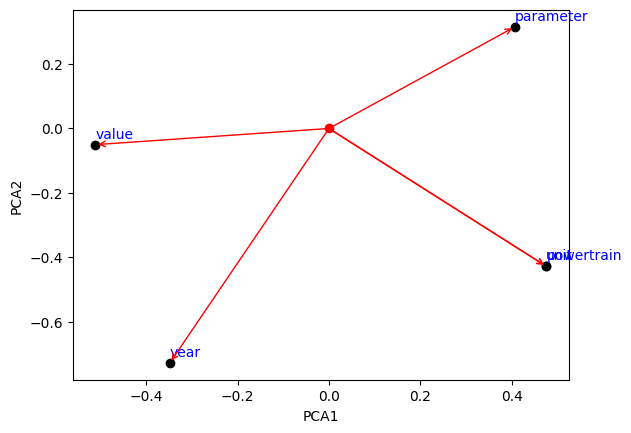

In [ ]:
# Fit the PCA object to the data
pca = PCA(n_components=5)
pca.fit(data_3)

# Define the pca_plot function
def pca_plot(pca, df, x_axis=0, y_axis=1, scale=1):
    plt.scatter(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, color='black')
    for x,y,name in zip(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, df.columns):
        plt.text(x, y+0.02, name, color='blue')
        plt.annotate('', (x,y), (0,0), arrowprops=dict(arrowstyle='->', color='red'))
    plt.scatter(0, 0, c='red')
    plt.xlabel(f'PCA{x_axis+1}')
    plt.ylabel(f'PCA{y_axis+1}')
    plt.show()

# Use the updated pca object in the pca_plot function
pca_plot(pca, data2)